In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app = pd.read_csv(r"C:\Users\divya\Downloads\EDA  CREDITS\application_data.csv")

# Handeling missing values

In [3]:
app30 = app.columns[app.isna().sum() > 92254].tolist()

In [4]:
122-len(app30)

72

In [88]:
#droppinh irrelevamt columns

In [5]:
app.drop( app30 , axis = 1 , inplace = True)

In [91]:
app.shape

(224072, 27)

In [6]:
irrel = ['DAYS_REGISTRATION','DAYS_ID_PUBLISH',
         'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
         'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
         'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
         'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
         'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
         'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
         'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
         'REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
         'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
         'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
         'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
         'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
         'FLAG_DOCUMENT_21',"DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_MON",
         "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR",
         "AMT_REQ_CREDIT_BUREAU_YEAR"
 ]


In [7]:
app.drop( irrel , axis = 1 , inplace = True)

In [8]:

app.isna().sum()/307511*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
dtype: float64

In [9]:
app["AMT_ANNUITY"].fillna(app["AMT_ANNUITY"].median(),inplace = True)

In [10]:
app["AMT_GOODS_PRICE"].fillna(app["AMT_GOODS_PRICE"].median(),inplace = True)

In [11]:
app["NAME_TYPE_SUITE"].fillna(app["NAME_TYPE_SUITE"].mode()[0] , inplace = True)

In [12]:
app["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0, inplace=True)

In [13]:
app["EXT_SOURCE_2"] = app["EXT_SOURCE_2"].fillna(app["EXT_SOURCE_2"].median())

In [14]:
app["EXT_SOURCE_3"] = app["EXT_SOURCE_3"].fillna(app["EXT_SOURCE_3"].median())

In [15]:
app["CNT_FAM_MEMBERS"].fillna(2, inplace=True)

In [16]:
app.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
AMT_REQ_CREDIT_BUREAU_QRT      0
dtype: int64

# Standardise

In [17]:
app["AGE"] = app["DAYS_BIRTH"].apply(lambda x : np.floor(x/-365))

In [18]:
app['YEARS_EMPLOYED'] = app["DAYS_EMPLOYED"].apply(lambda x : abs(np.floor(x/365)))

In [19]:
app.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'] , axis = 1 , inplace = True)

In [20]:
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','YEARS_EMPLOYED']
for col in col_list_outlier: 
    q1 = app[col].quantile(0.25)
    q3 = app[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    app = app.loc[(app[col] > range_low) & (app[col] < range_high)]

app.shape

(224076, 24)

# Categorising

In [21]:
#1.Age group

def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [22]:
#Creating new column AGE_GROUP
app['AGE_GROUP'] = app['AGE'].apply(age_group)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,1.0,2,2,Business Entity Type 3,0.262949,0.139376,0.0,25.0,2.0,Young
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,2.0,1,1,School,0.622246,0.535276,0.0,45.0,4.0,Mid Age
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,1.0,2,2,Government,0.555912,0.729567,0.0,52.0,1.0,Mid Age
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2.0,2,2,Business Entity Type 3,0.650442,0.535276,0.0,52.0,9.0,Mid Age
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,1.0,2,2,Religion,0.322738,0.535276,0.0,54.0,9.0,Mid Age


In [23]:
#Credit group

def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [24]:
app["CREDIT_GROUP"] = app["AMT_CREDIT"].apply(credit_group)
app.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2,2,Business Entity Type 3,0.262949,0.139376,0.0,25.0,2.0,Young,Low
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1,1,School,0.622246,0.535276,0.0,45.0,4.0,Mid Age,High
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,2,2,Government,0.555912,0.729567,0.0,52.0,1.0,Mid Age,Low


In [25]:
#income
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [28]:

app['INCOME_GROUP'] = app['AMT_INCOME_TOTAL'].apply(income_group)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2,Business Entity Type 3,0.262949,0.139376,0.0,25.0,2.0,Young,Low,High
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1,School,0.622246,0.535276,0.0,45.0,4.0,Mid Age,High,High
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,2,Government,0.555912,0.729567,0.0,52.0,1.0,Mid Age,Low,Low
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2,Business Entity Type 3,0.650442,0.535276,0.0,52.0,9.0,Mid Age,Low,Medium
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,2,Religion,0.322738,0.535276,0.0,54.0,9.0,Mid Age,Medium,Medium


In [27]:
app['INCOME_GROUP'] = app['AMT_INCOME_TOTAL'].apply(income_group)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2,Business Entity Type 3,0.262949,0.139376,0.0,25.0,2.0,Young,Low,High
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1,School,0.622246,0.535276,0.0,45.0,4.0,Mid Age,High,High
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,2,Government,0.555912,0.729567,0.0,52.0,1.0,Mid Age,Low,Low
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2,Business Entity Type 3,0.650442,0.535276,0.0,52.0,9.0,Mid Age,Low,Medium
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,2,Religion,0.322738,0.535276,0.0,54.0,9.0,Mid Age,Medium,Medium


In [29]:
app['EXT_SOURCE_SCORE'] = round(((app['EXT_SOURCE_2'] + app['EXT_SOURCE_3'])/2),2)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,Business Entity Type 3,0.262949,0.139376,0.0,25.0,2.0,Young,Low,High,0.20
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,School,0.622246,0.535276,0.0,45.0,4.0,Mid Age,High,High,0.58
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,Government,0.555912,0.729567,0.0,52.0,1.0,Mid Age,Low,Low,0.64
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,Business Entity Type 3,0.650442,0.535276,0.0,52.0,9.0,Mid Age,Low,Medium,0.59
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,Religion,0.322738,0.535276,0.0,54.0,9.0,Mid Age,Medium,Medium,0.43


In [30]:
app.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace = True)

In [31]:
#EXT_src normalised
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [32]:
app['EXT_SCORE_CATEGORY'] = app['EXT_SOURCE_SCORE'].apply(ext_source_group)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2,Business Entity Type 3,0.0,25.0,2.0,Young,Low,High,0.20,Low
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1,School,0.0,45.0,4.0,Mid Age,High,High,0.58,Medium
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,2,Government,0.0,52.0,1.0,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2,Business Entity Type 3,0.0,52.0,9.0,Mid Age,Low,Medium,0.59,Medium
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,2,Religion,0.0,54.0,9.0,Mid Age,Medium,Medium,0.43,Medium


In [33]:
app = app[~(app['CODE_GENDER'] == 'XNA')]

# Dividing dataset into , Target ==1 and Target == 0 :

In [34]:
app1 = app[app["TARGET"]==1]
app1.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2,Business Entity Type 3,0.0,25.0,2.0,Young,Low,High,0.20,Low
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,...,2,Business Entity Type 3,2.0,51.0,8.0,Mid Age,High,Medium,0.37,Low
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,...,2,Business Entity Type 3,0.0,47.0,4.0,Mid Age,High,High,0.31,Low


In [35]:
app0 = app[app["TARGET"]==0]
app0.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,AGE_GROUP,CREDIT_GROUP,INCOME_GROUP,EXT_SOURCE_SCORE,EXT_SCORE_CATEGORY
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1,School,0.0,45.0,4.0,Mid Age,High,High,0.58,Medium
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,2,Government,0.0,52.0,1.0,Mid Age,Low,Low,0.64,High
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2,Business Entity Type 3,0.0,52.0,9.0,Mid Age,Low,Medium,0.59,Medium


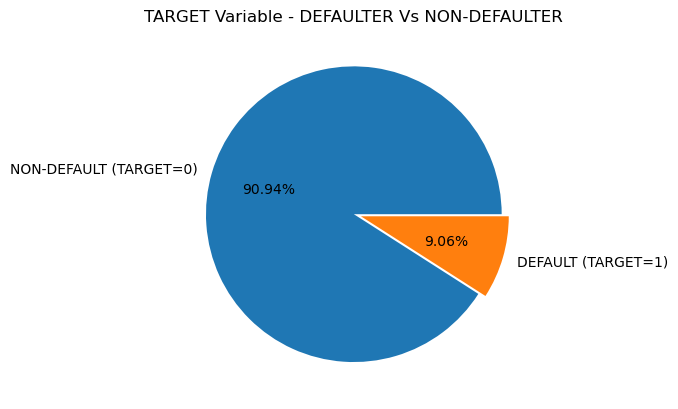

In [90]:

plt.pie(app["TARGET"].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%.2f%%')
plt.title('TARGET Variable - DEFAULTER Vs NON-DEFAULTER')
plt.show()

# Univariate analysis

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Gender')]

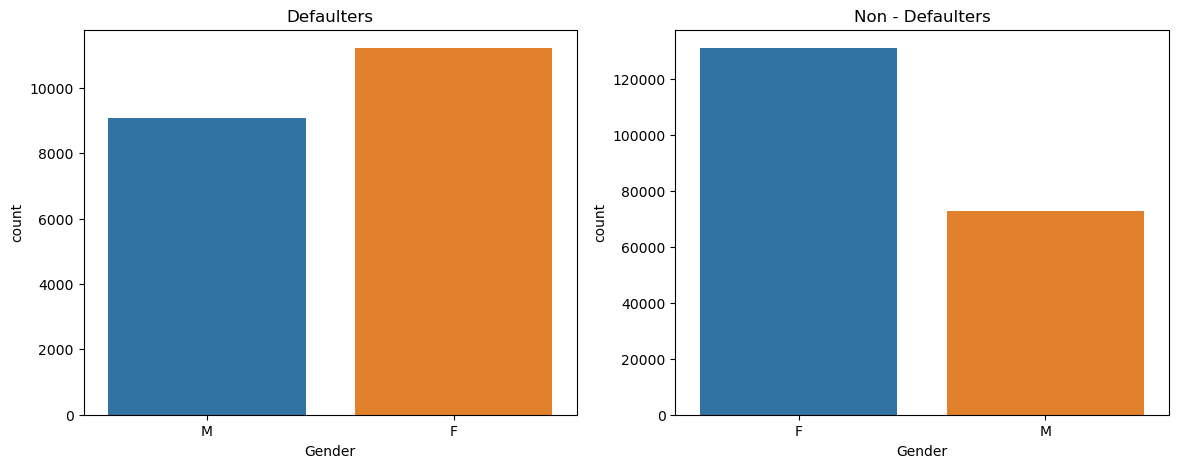

In [36]:
#Gender 


plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot( app1["CODE_GENDER"])
plt.title("Defaulters")
ax.set(xlabel = 'Gender')

#plt.figtext(0.5, -0.1, "Defaluters - We can see that females are slightly more in number of defaulters than male.", ha='center', fontsize=12)
#plt.figtext(0.5, -0.2, "Non-defaluters - The same pattern continues for non-defaluters as well. The females are more in number here than male. ", ha='center', fontsize=12)


plt.subplot(1,2,2)    
ax = sns.countplot( app0["CODE_GENDER"])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Gender')


C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Contract type')]

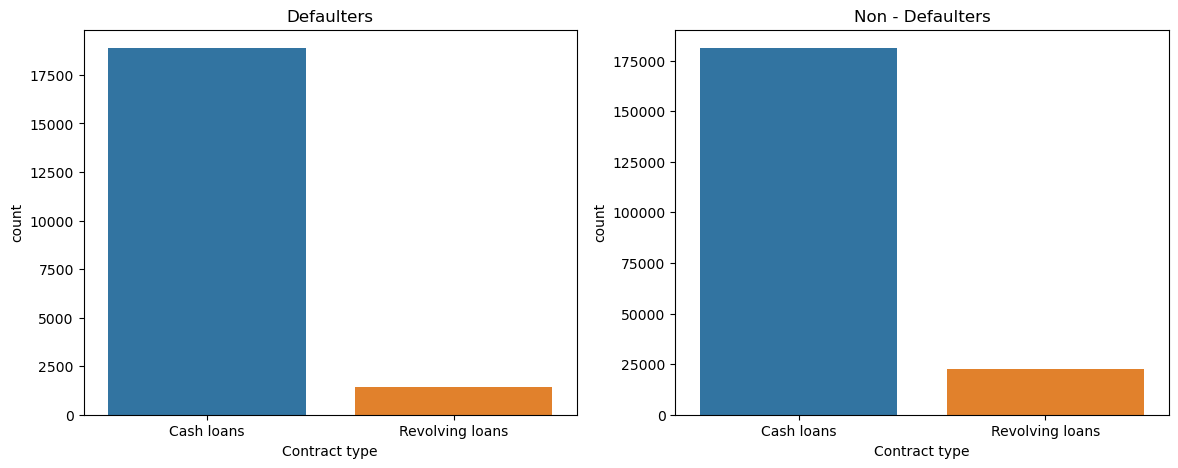

In [37]:
# contract type


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)    
ax = sns.countplot( app1["NAME_CONTRACT_TYPE"])
plt.title("Defaulters")
ax.set(xlabel = 'Contract type')


#plt.figtext(0.5, -0.1, "Analysis - We observe that similar trend is observed in both the cases.",ha='center', fontsize=12)



plt.subplot(1,2,2)    
ax = sns.countplot( app0["NAME_CONTRACT_TYPE"])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Contract type')

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'State servant'),
 Text(1, 0, 'Working'),
 Text(2, 0, 'Commercial associate'),
 Text(3, 0, 'Student'),
 Text(4, 0, 'Pensioner'),
 Text(5, 0, 'Businessman'),
 Text(6, 0, 'Maternity leave')]

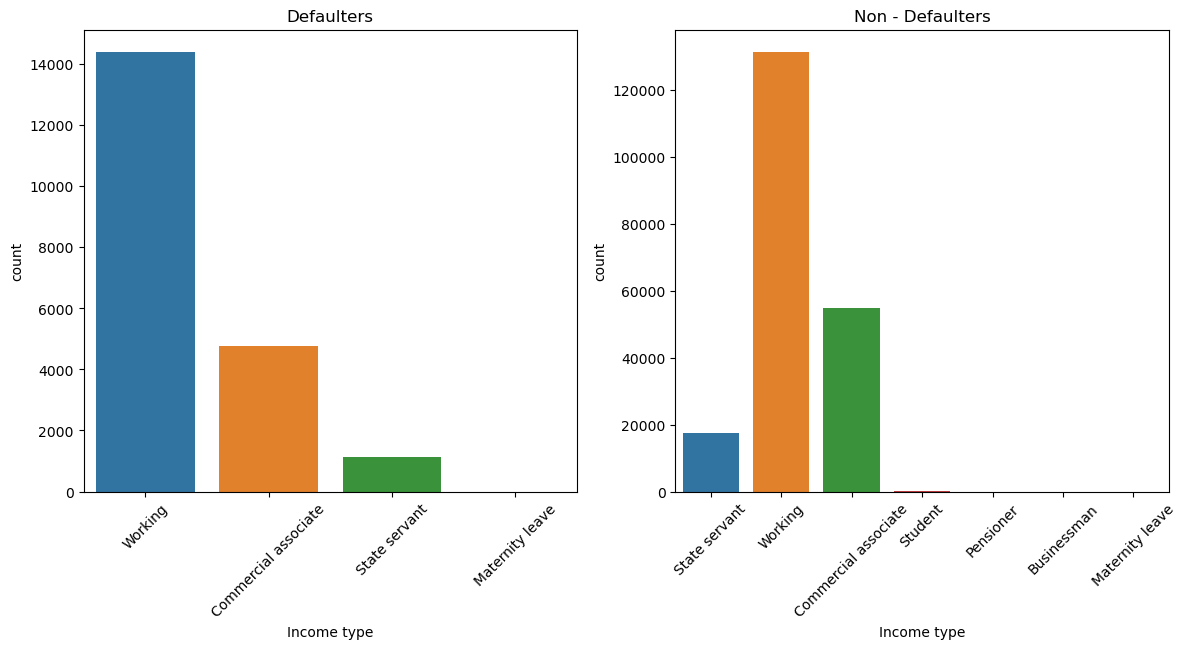

In [38]:
#income type

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)    
ax = sns.countplot( app1['NAME_INCOME_TYPE'])
plt.title("Defaulters")
ax.set(xlabel = 'Income type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#plt.figtext(0.5, -0.1, "Analysis :In In both the cases working cases working class is more likely to be a defaulter and a non-defaulter.",ha='center', fontsize=12)

plt.subplot(1,2,2)    
ax = sns.countplot( app0['NAME_INCOME_TYPE'])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Income type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Cash loans'), Text(1, 0, 'Revolving loans')]

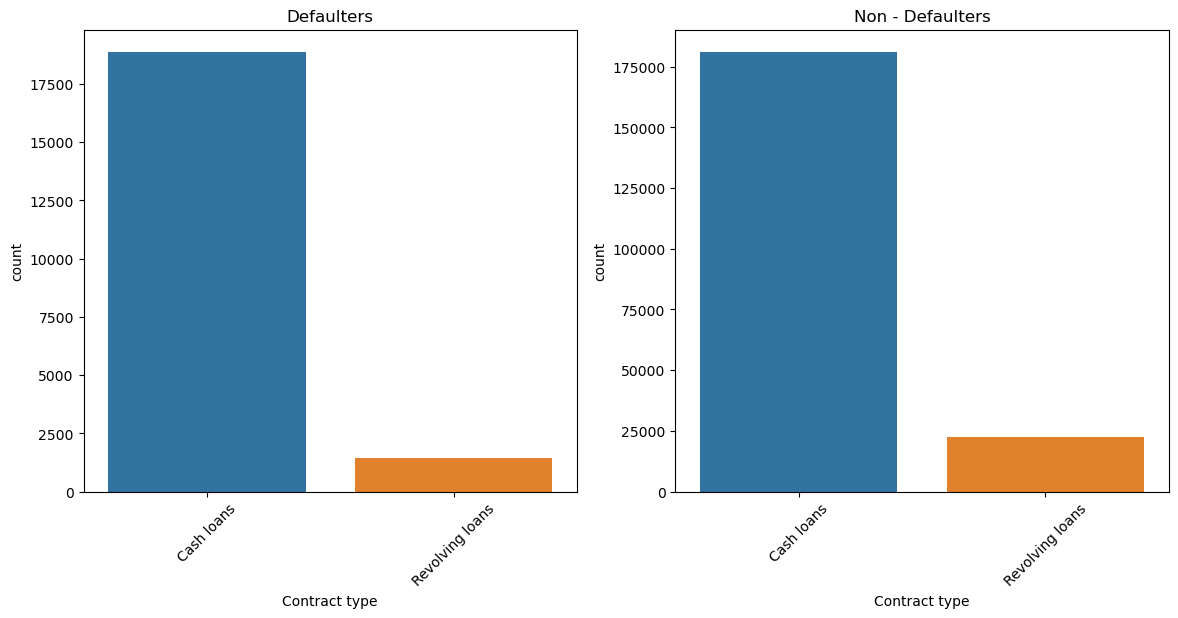

In [39]:
#contract type

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)    
ax = sns.countplot( app1["NAME_CONTRACT_TYPE"])
plt.title("Defaulters")
ax.set(xlabel = 'Contract type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


# The category - married is more likey to be a 


plt.subplot(1,2,2)    
ax = sns.countplot( app0["NAME_CONTRACT_TYPE"])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Contract type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Married'),
 Text(1, 0, 'Single / not married'),
 Text(2, 0, 'Civil marriage'),
 Text(3, 0, 'Widow'),
 Text(4, 0, 'Separated'),
 Text(5, 0, 'Unknown')]

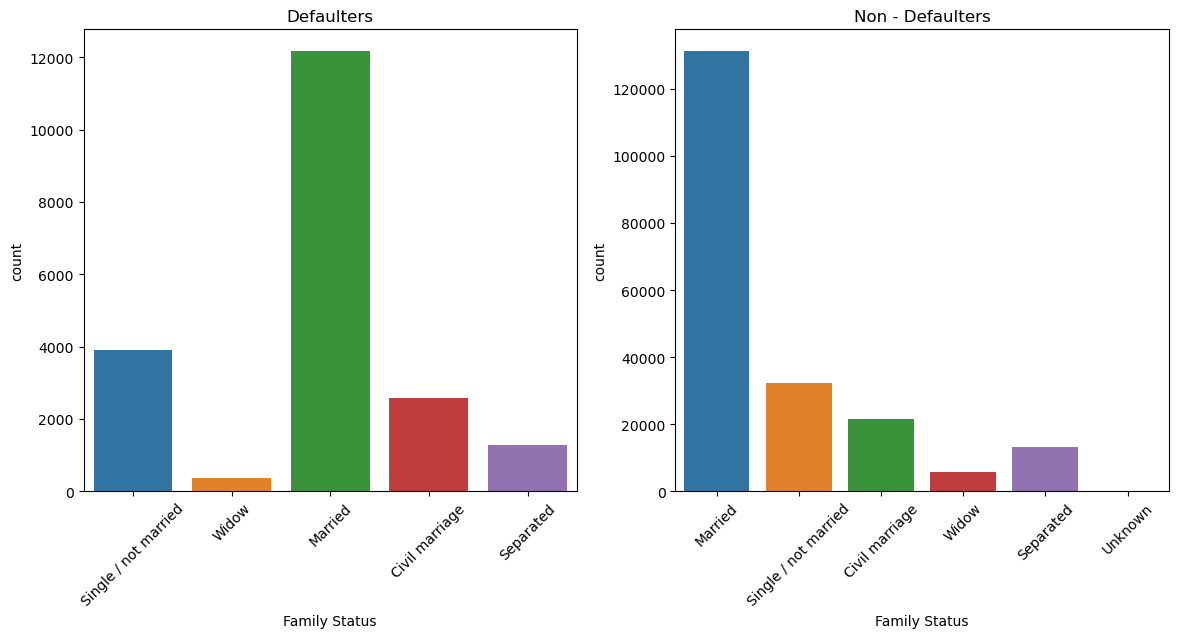

In [40]:
#'NAME_FAMILY_STATUS'


plt.figure(figsize=(14,6))
plt.subplot(1,2,1)    
ax = sns.countplot( app1['NAME_FAMILY_STATUS'])
plt.title("Defaulters")
ax.set(xlabel = 'Family Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)    
ax = sns.countplot( app0['NAME_FAMILY_STATUS'])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Family Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'House / apartment'),
 Text(1, 0, 'Rented apartment'),
 Text(2, 0, 'With parents'),
 Text(3, 0, 'Municipal apartment'),
 Text(4, 0, 'Office apartment'),
 Text(5, 0, 'Co-op apartment')]

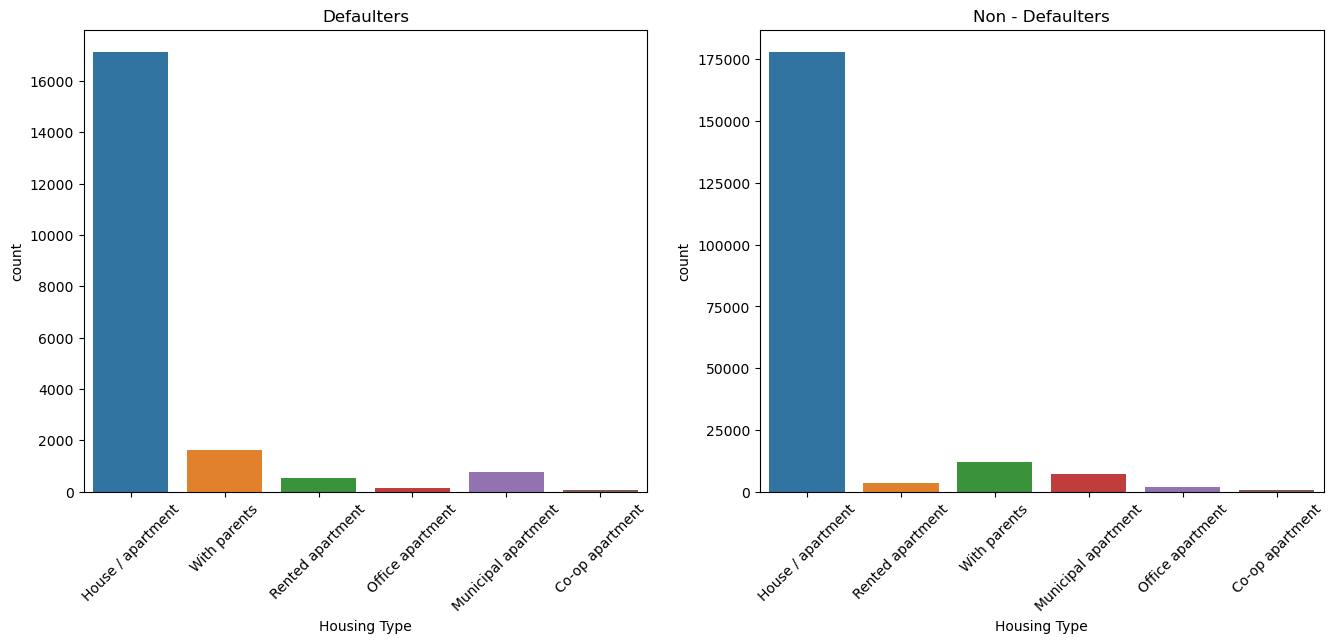

In [41]:
#'NAME_HOUSING_TYPE'

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)    
ax = sns.countplot( app1['NAME_HOUSING_TYPE'])
plt.title("Defaulters")
ax.set(xlabel = 'Housing Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)    
ax = sns.countplot( app0['NAME_HOUSING_TYPE'])
plt.title("Non - Defaulters")
ax.set(xlabel = 'Housing Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_CREDIT', ylabel='Density'>

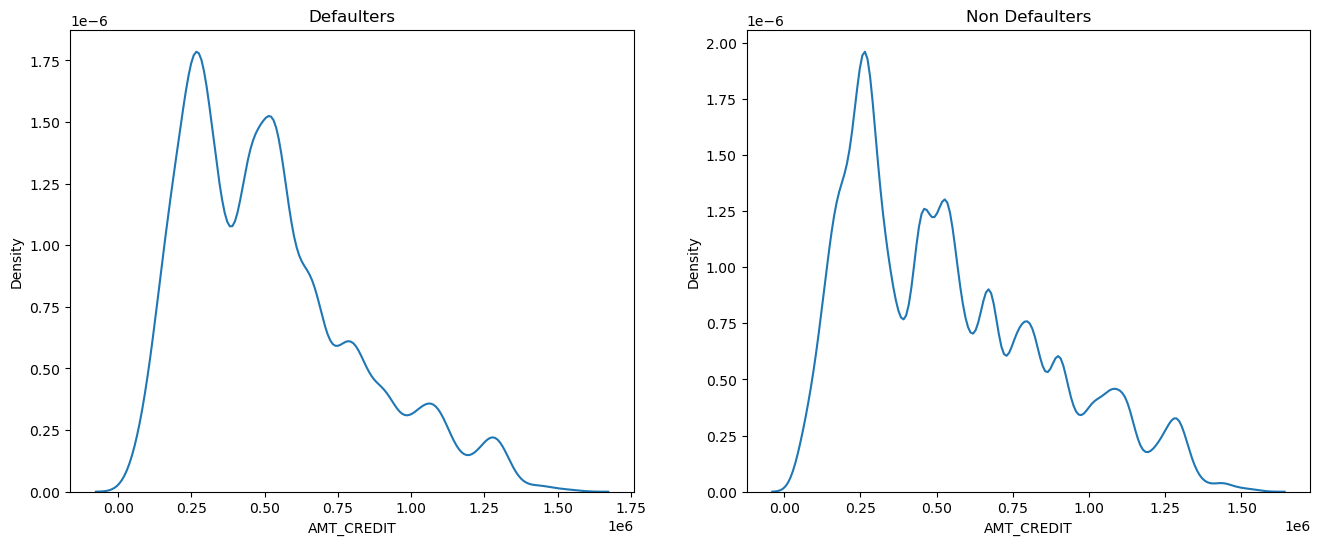

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_CREDIT'],hist=False)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

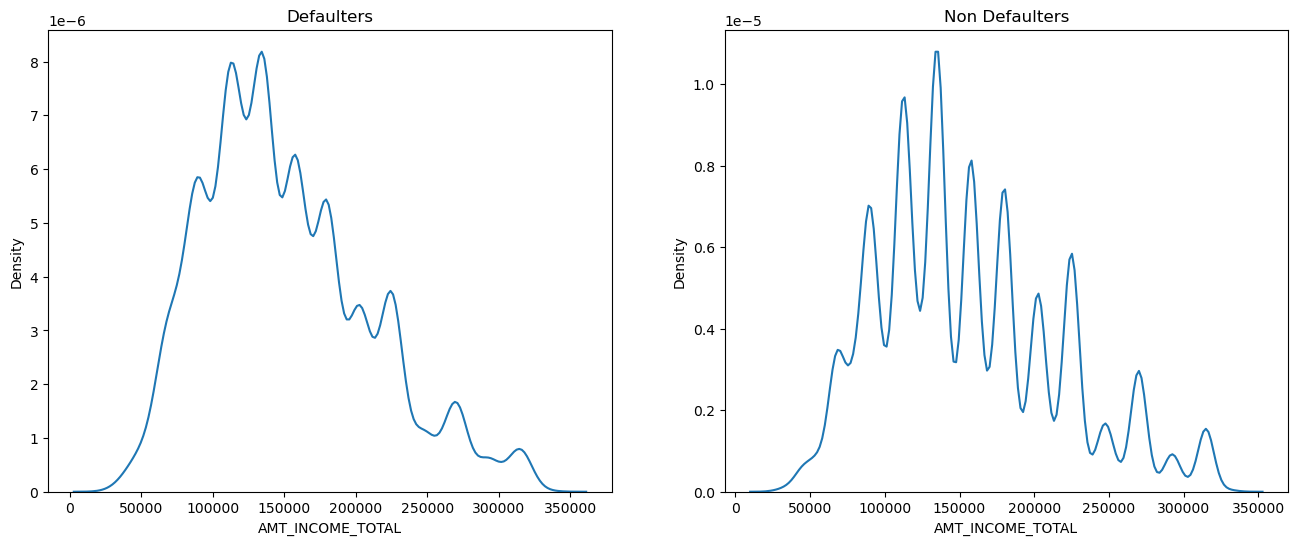

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_INCOME_TOTAL'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_INCOME_TOTAL'],hist=False)




#Defaulters - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
#Non defaulters - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.


C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

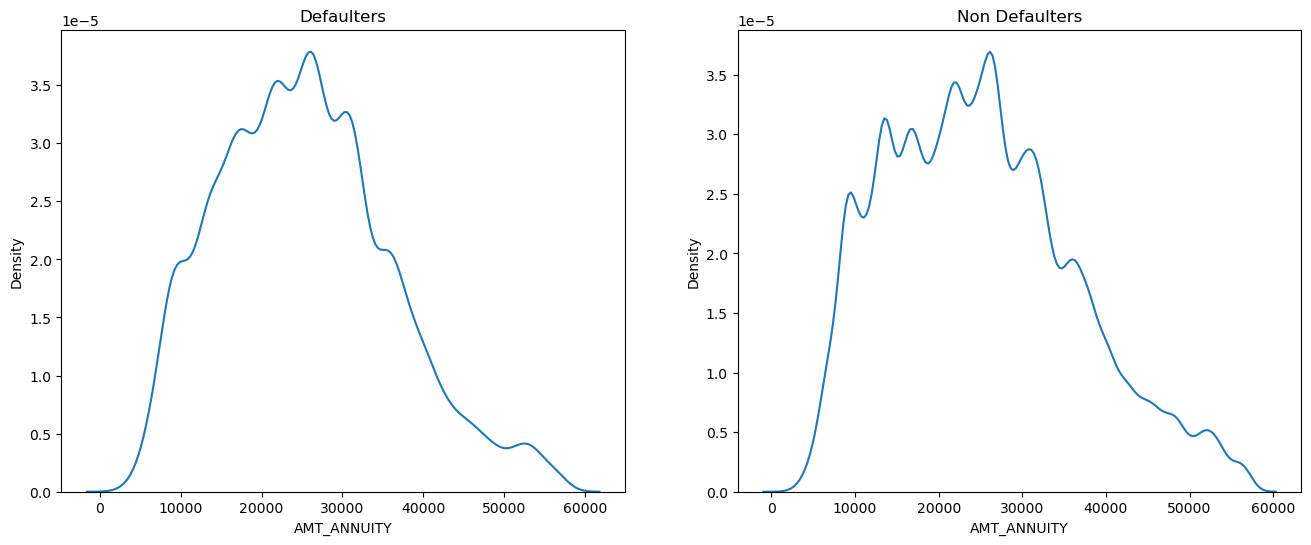

In [44]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_ANNUITY'],hist=False)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_GOODS_PRICE', ylabel='Density'>

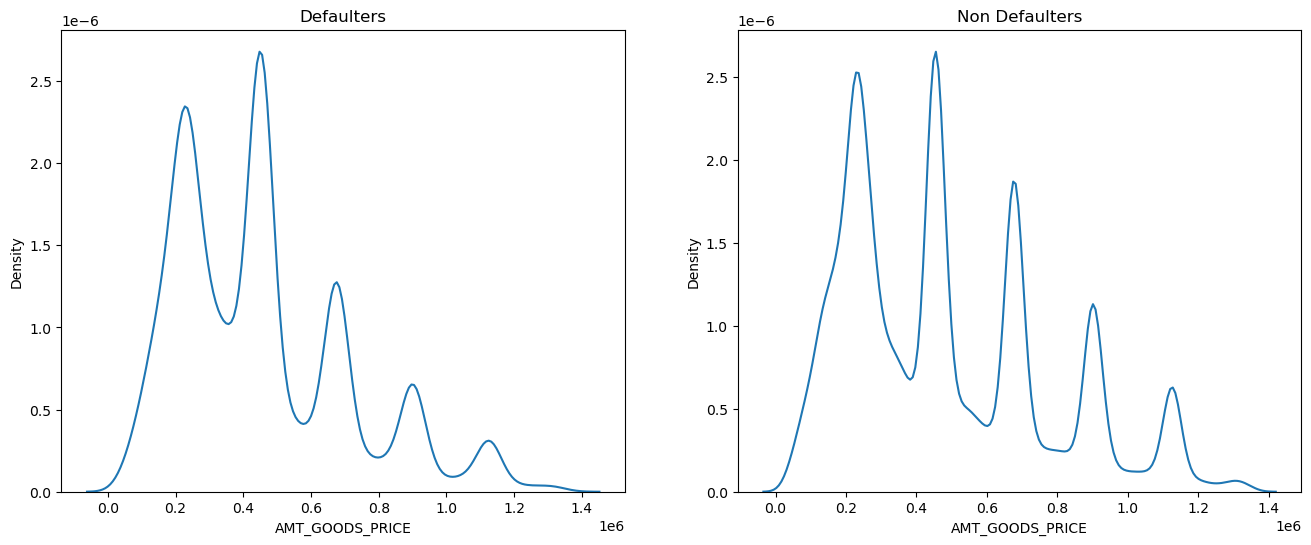

In [45]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_GOODS_PRICE'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_GOODS_PRICE'],hist=False)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_GOODS_PRICE', ylabel='Density'>

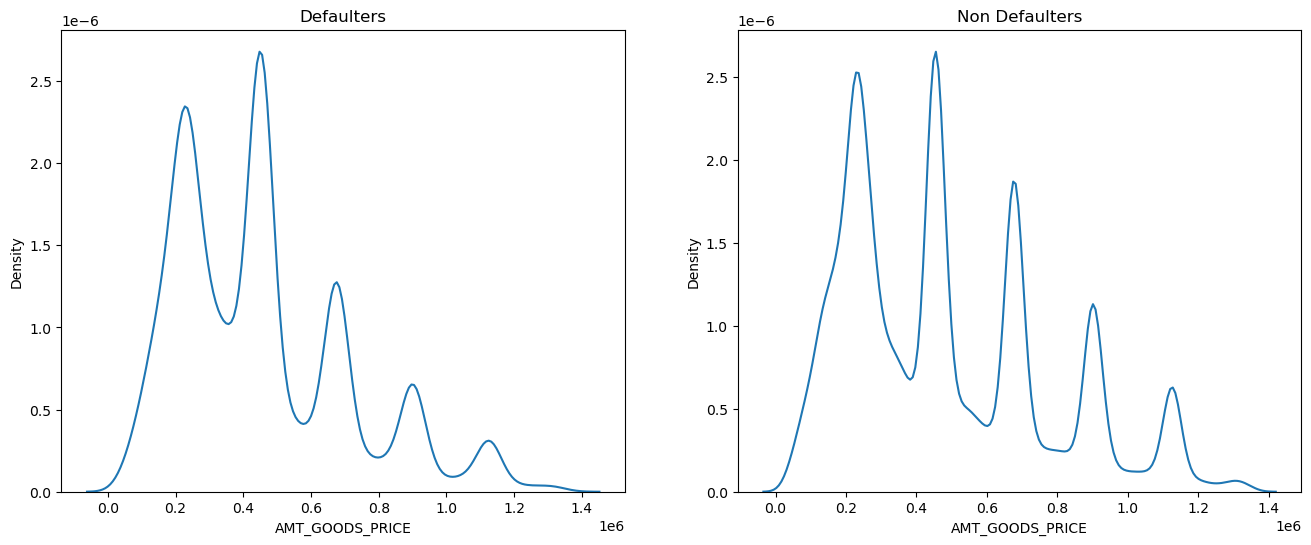

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_GOODS_PRICE'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_GOODS_PRICE'],hist=False)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

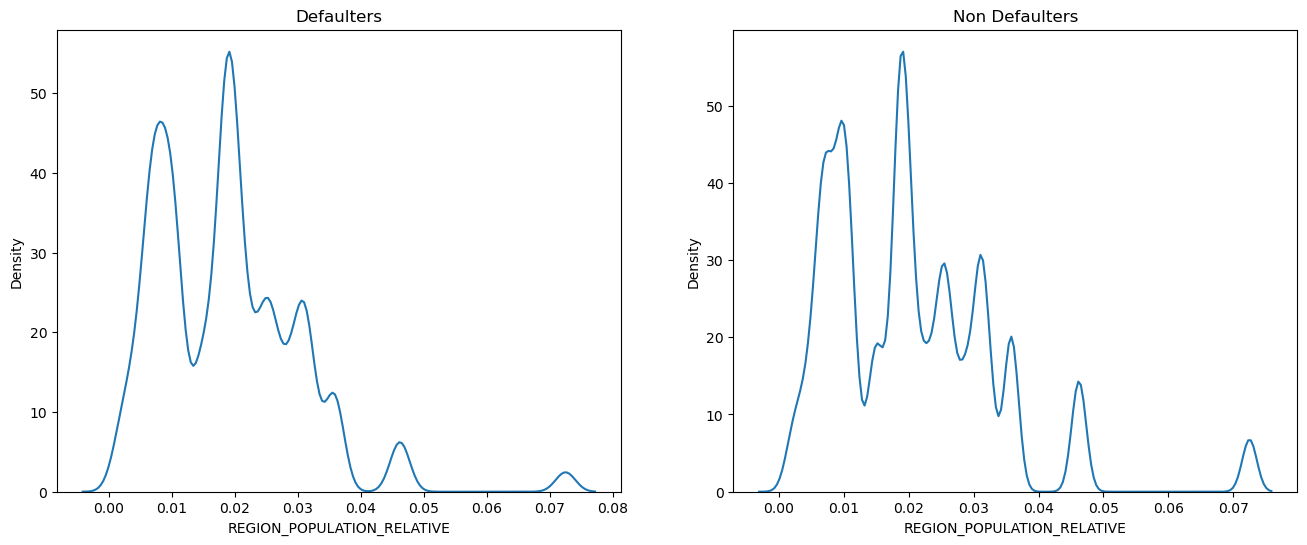

In [47]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['REGION_POPULATION_RELATIVE'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['REGION_POPULATION_RELATIVE'],hist=False)

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='REGION_RATING_CLIENT', ylabel='Density'>

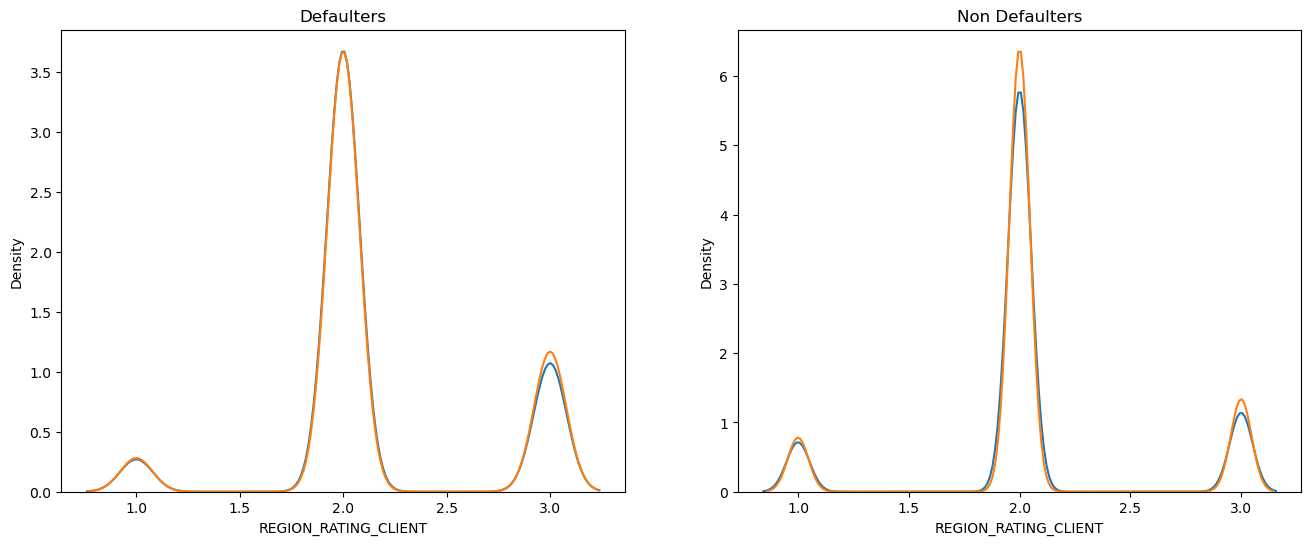

In [48]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
subset = app1[app1['CODE_GENDER'] == 'M']
sns.distplot(subset['REGION_RATING_CLIENT'],hist=False,label='M')
subset = app1[app1['CODE_GENDER'] == 'F']
sns.distplot(subset['REGION_RATING_CLIENT'],hist=False,label='F')

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
subset = app0[app0['CODE_GENDER'] == 'M']
sns.distplot(subset['REGION_RATING_CLIENT'],hist=False,label='M')
subset = app0[app0['CODE_GENDER'] == 'F']
sns.distplot(subset['REGION_RATING_CLIENT'],hist=False,label='F')

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

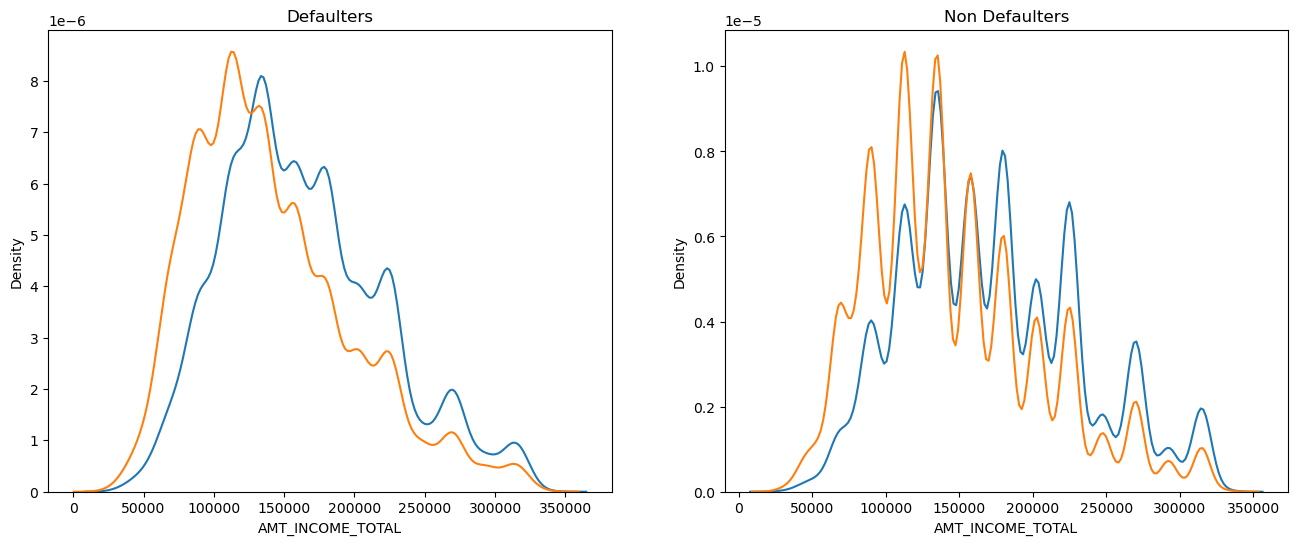

In [49]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
subset = app1[app1['CODE_GENDER'] == 'M']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label='M')
subset = app1[app1['CODE_GENDER'] == 'F']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label='F')

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
subset = app0[app0['CODE_GENDER'] == 'M']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label='M')
subset = app0[app0['CODE_GENDER'] == 'F']
sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label='F')

C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\divya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Non Defaulters'}, xlabel='AMT_ANNUITY', ylabel='Density'>

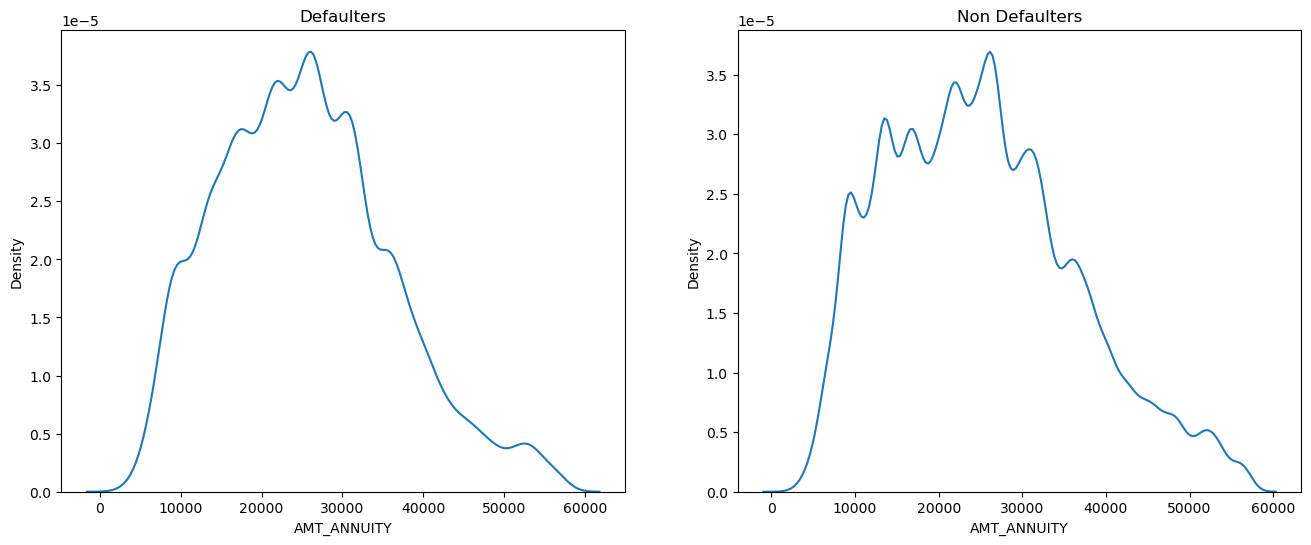

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(app1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(app0['AMT_ANNUITY'],hist=False)

Text(0.5, 1.0, 'Non-Defaulters')

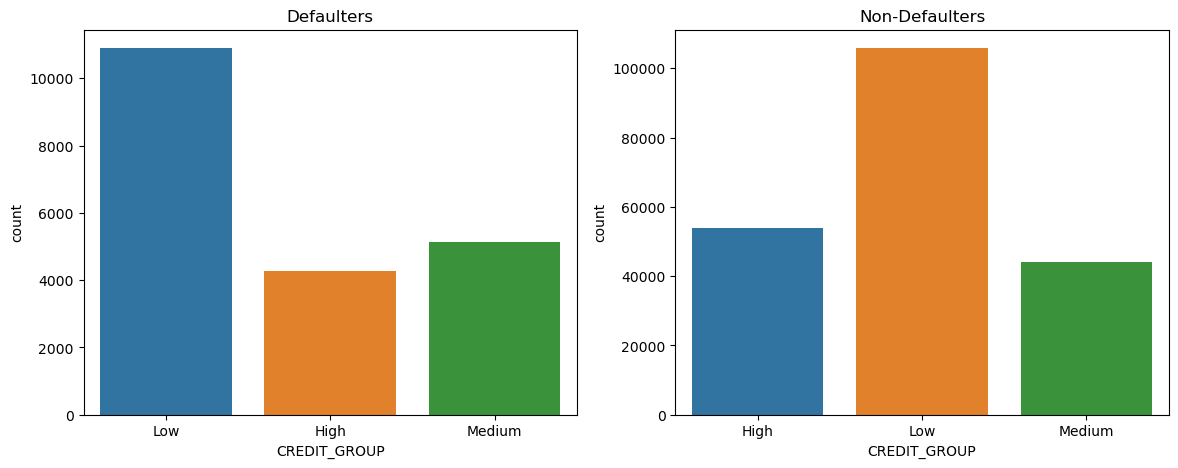

In [51]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=app1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=app0)
plt.title('Non-Defaulters')

Text(0.5, 1.0, 'Non-Defaulters')

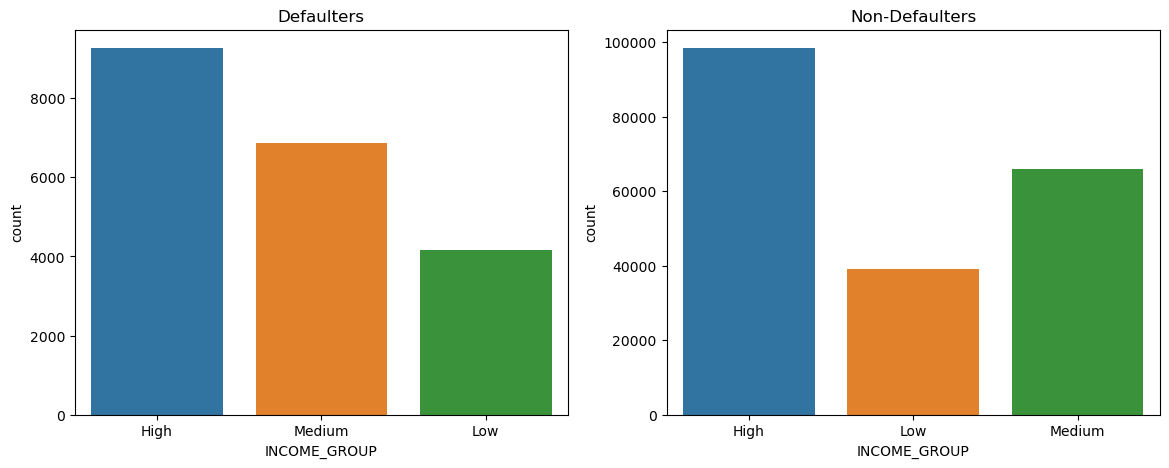

In [52]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data =app1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=app0)
plt.title('Non-Defaulters')



#Defaulters - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
#Non defaulters - There is not much difference in the likelihood for non defaulters in the age groups.

Text(0.5, 1.0, 'Non-Defaulters')

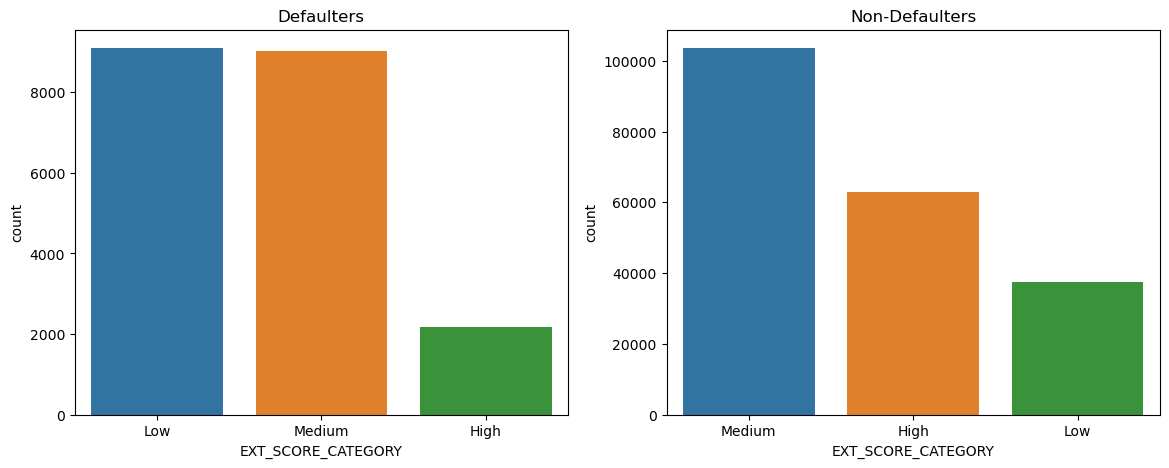

In [53]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=app1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=app0)
plt.title('Non-Defaulters')

In [54]:
corr_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE','REGION_RATING_CLIENT']


In [55]:

df_corr_target_1 = app1[corr_cols]
df_corr_target_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
0,202500.0,406597.5,24700.5,351000.0,25.0,0.20,2
26,112500.0,979992.0,27076.5,702000.0,51.0,0.37,3
40,202500.0,1193580.0,35028.0,855000.0,47.0,0.31,2
42,135000.0,288873.0,16258.5,238500.0,36.0,0.54,3
110,157500.0,723996.0,30802.5,585000.0,28.0,0.20,2


In [56]:
df_corr_target_1.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.303719,0.374999,0.305222,0.087864,0.039214,-0.145025
AMT_CREDIT,0.303719,1.000000,0.740877,0.977379,0.188499,0.103540,-0.038445
AMT_ANNUITY,0.374999,0.740877,1.000000,0.737783,0.081620,0.085257,-0.043889
AMT_GOODS_PRICE,0.305222,0.977379,0.737783,1.000000,0.184700,0.112373,-0.048151
AGE,0.087864,0.188499,0.081620,0.184700,1.000000,0.170694,-0.046290
EXT_SOURCE_SCORE,0.039214,0.103540,0.085257,0.112373,0.170694,1.000000,-0.164008
REGION_RATING_CLIENT,-0.145025,-0.038445,-0.043889,-0.048151,-0.046290,-0.164008,1.000000


In [58]:
df_corr_target_0 = app0[corr_cols]
df_corr_target_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,EXT_SOURCE_SCORE,REGION_RATING_CLIENT
1,270000.0,1293502.5,35698.5,1129500.0,45.0,0.58,1
2,67500.0,135000.0,6750.0,135000.0,52.0,0.64,2
3,135000.0,312682.5,29686.5,297000.0,52.0,0.59,2
4,121500.0,513000.0,21865.5,513000.0,54.0,0.43,2
5,99000.0,490495.5,27517.5,454500.0,46.0,0.49,2


In [59]:
app0.corr() 

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_QRT,AGE,YEARS_EMPLOYED,EXT_SOURCE_SCORE
SK_ID_CURR,1.000000,NaN,0.000014,0.001866,0.000103,0.001069,0.001003,0.000407,-0.001126,-0.000019,-0.000695,-0.002040,0.000697,-0.000293,0.001938
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000014,NaN,1.000000,-0.025250,-0.016121,-0.005231,-0.020562,-0.029832,0.892267,0.037878,0.037627,-0.002042,-0.238388,-0.056116,-0.027221
AMT_INCOME_TOTAL,0.001866,NaN,-0.025250,1.000000,0.310918,0.387714,0.313887,0.138487,-0.022444,-0.177408,-0.196146,0.036781,0.038862,0.025863,0.050387
AMT_CREDIT,0.000103,NaN,-0.016121,0.310918,1.000000,0.753795,0.980909,0.048896,0.036641,-0.049594,-0.055308,0.031192,0.154554,0.083245,0.090107
AMT_ANNUITY,0.001069,NaN,-0.005231,0.387714,0.753795,1.000000,0.751422,0.064469,0.042920,-0.077674,-0.088511,0.020849,0.082121,0.040178,0.076614
AMT_GOODS_PRICE,0.001003,NaN,-0.020562,0.313887,0.980909,0.751422,1.000000,0.053917,0.034874,-0.051366,-0.056160,0.031752,0.149617,0.085055,0.097090
REGION_POPULATION_RELATIVE,0.000407,NaN,-0.029832,0.138487,0.048896,0.064469,0.053917,1.000000,-0.029204,-0.500225,-0.499469,-0.003959,0.036131,-0.009199,0.125980
CNT_FAM_MEMBERS,-0.001126,NaN,0.892267,-0.022444,0.036641,0.042920,0.034874,-0.029204,1.000000,0.043288,0.044771,0.003907,-0.174357,-0.023941,-0.008632
REGION_RATING_CLIENT,-0.000019,NaN,0.037878,-0.177408,-0.049594,-0.077674,-0.051366,-0.500225,0.043288,1.000000,0.950511,0.006819,-0.031474,0.018251,-0.200122


C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non Defaulters')

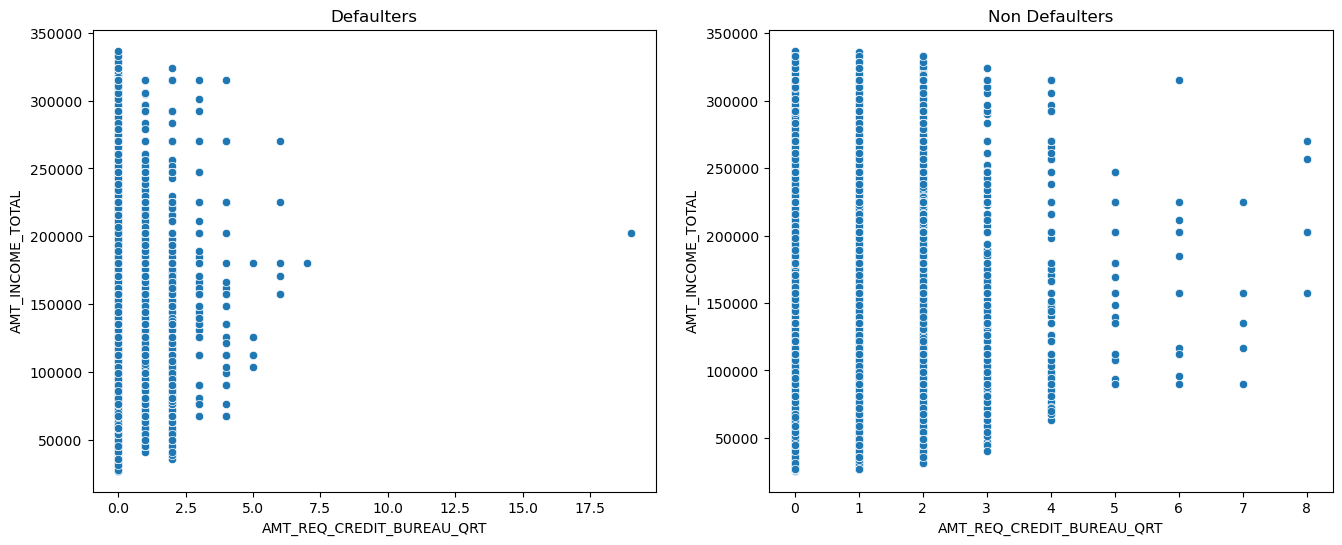

In [61]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_INCOME_TOTAL', data=app1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_INCOME_TOTAL', data=app0)
plt.title('Non Defaulters')

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non Defaulters')

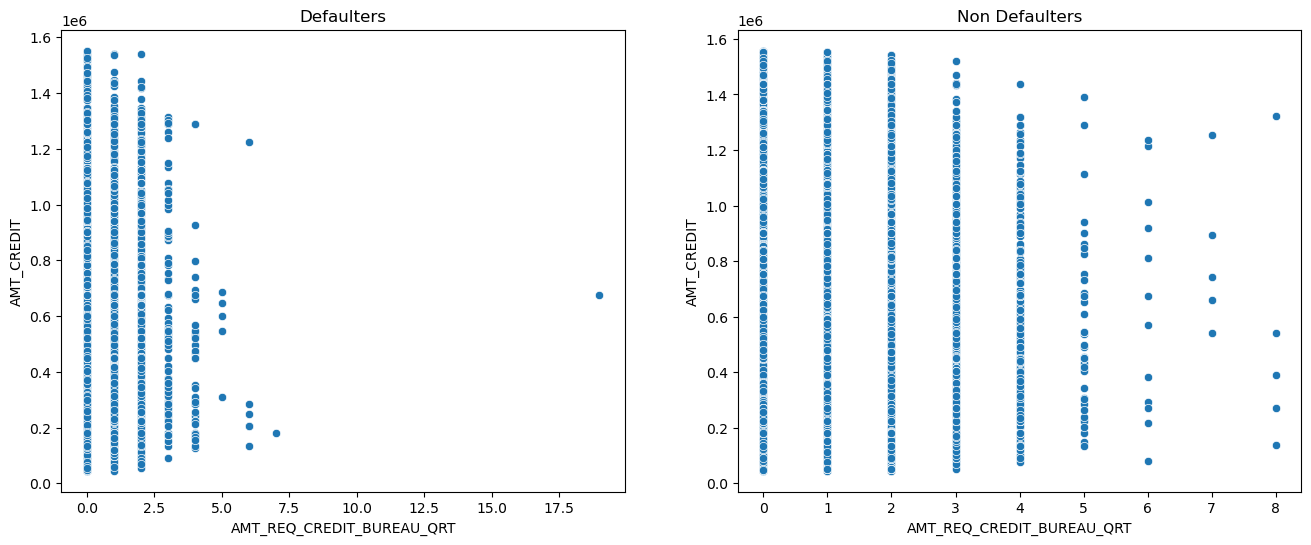

In [62]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=app1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_REQ_CREDIT_BUREAU_QRT','AMT_CREDIT', data=app0)
plt.title('Non Defaulters')

C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Non Defaulters')

C:\Users\divya\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


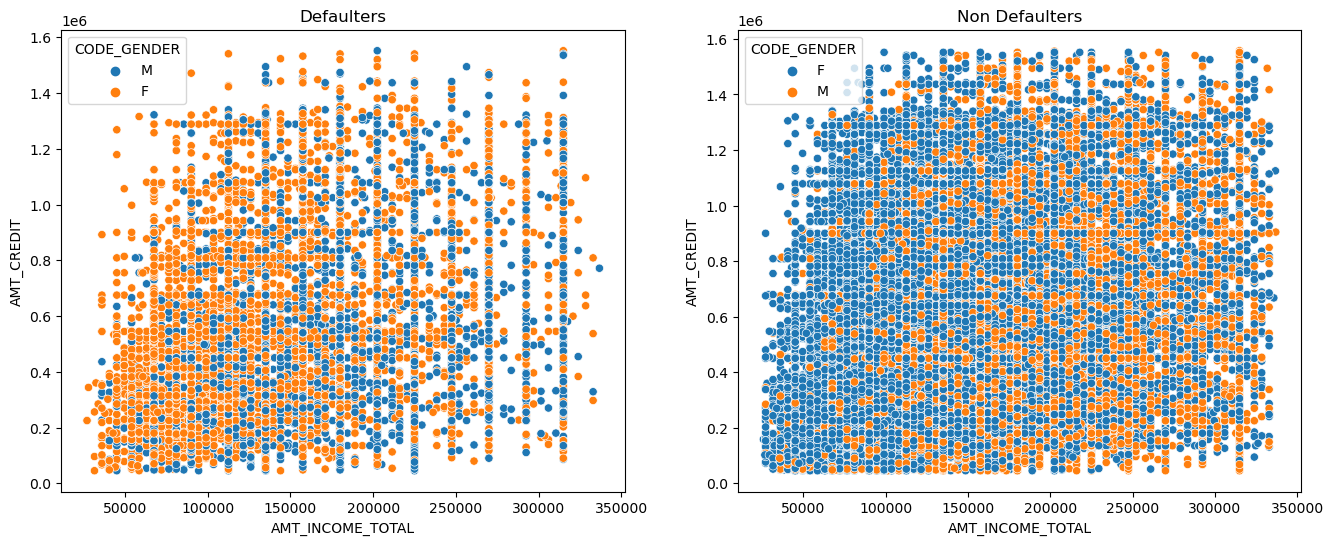

In [63]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue='CODE_GENDER', data=app1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot('AMT_INCOME_TOTAL','AMT_CREDIT',hue = 'CODE_GENDER', data=app0)
plt.title('Non Defaulters')

In [64]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

Text(0, 0.5, 'Defaulters')

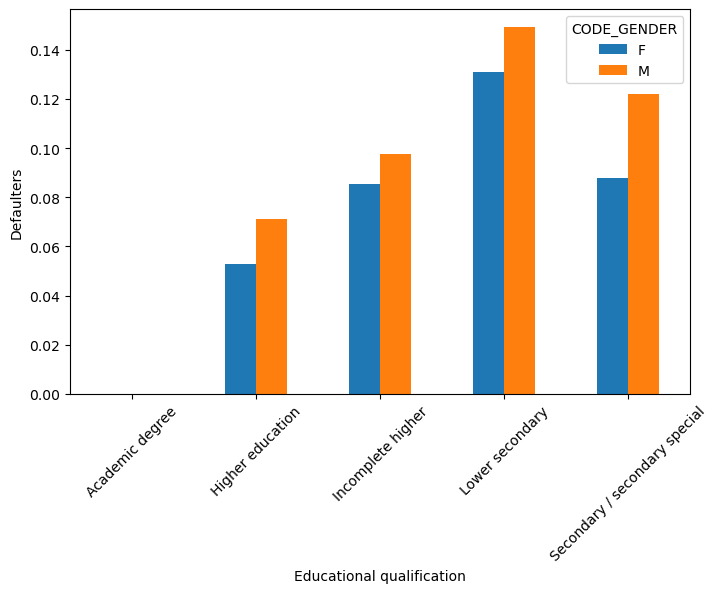

In [67]:
app.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

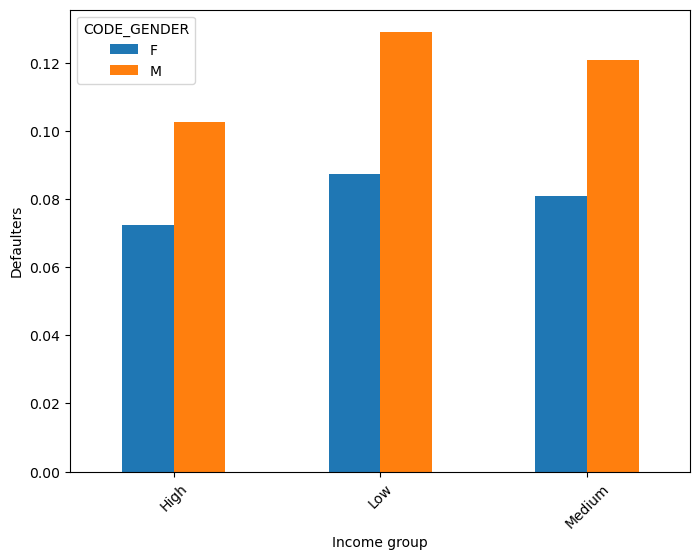

In [68]:
app.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

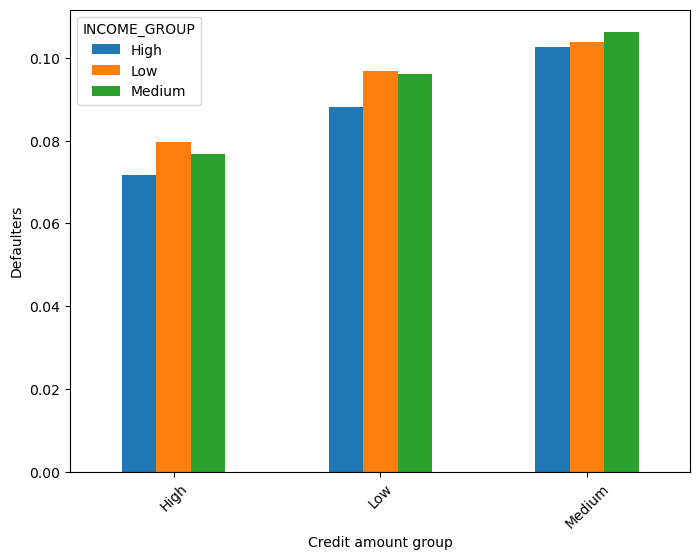

In [69]:
app.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

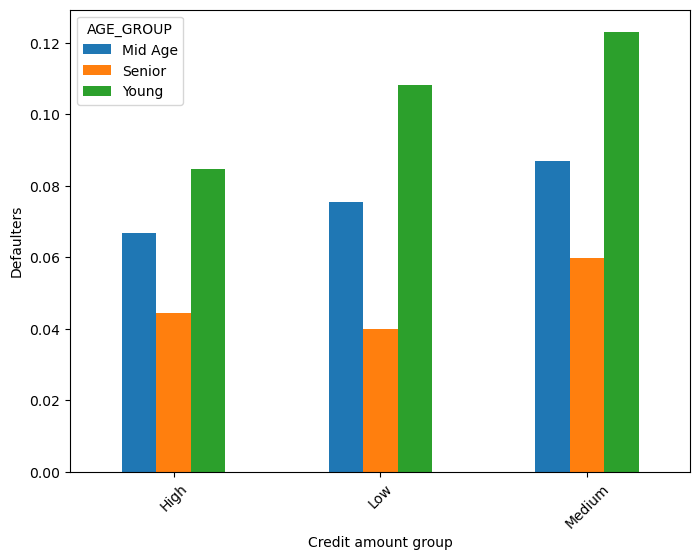

In [70]:
app.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

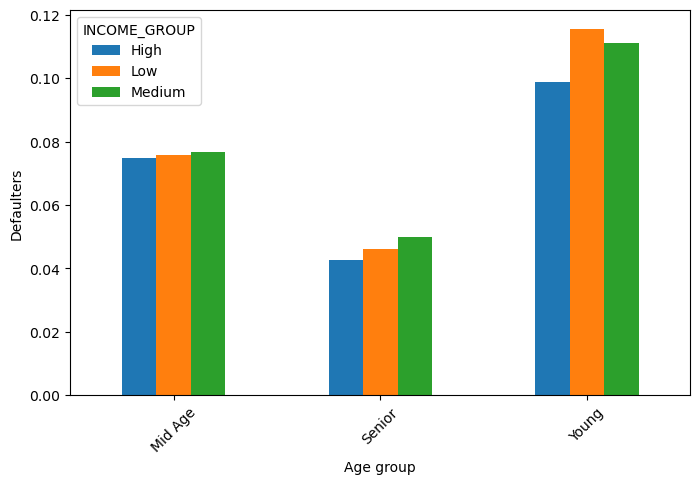

In [71]:
app.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

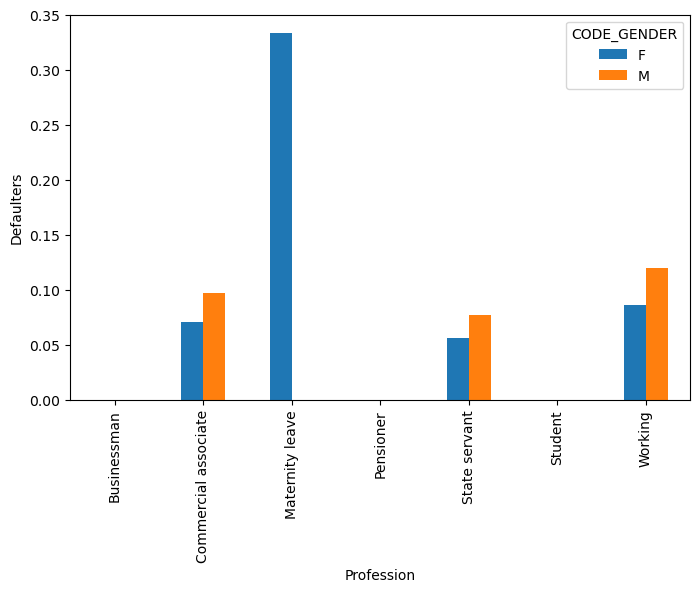

In [72]:
app.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

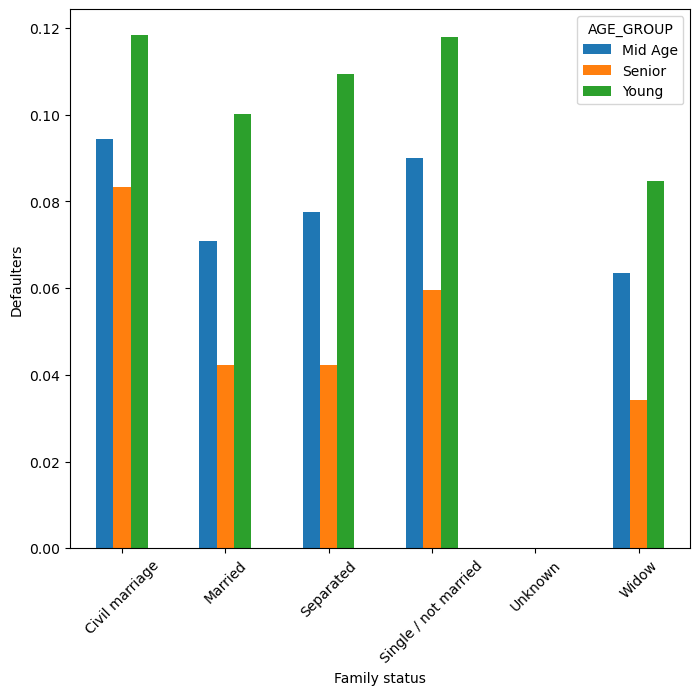

In [73]:
app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

Text(0, 0.5, 'Defaulters')

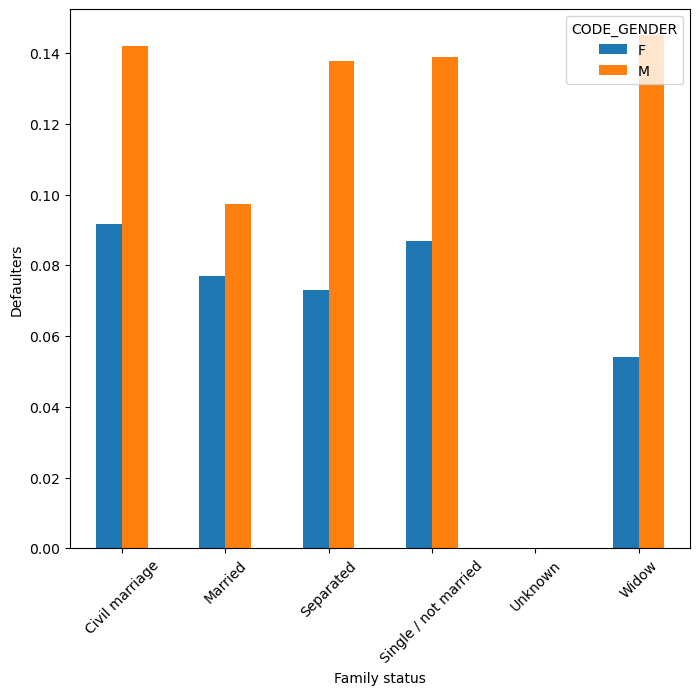

In [74]:
app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')

In [75]:
df_application_previous = pd.read_csv(r"C:\Users\divya\Downloads\EDA  CREDITS\previous_application.csv")
df_application_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
merged = pd.merge( app , df_application_previous , how = "left" , on = "SK_ID_CURR" )

In [77]:
merged.shape

(1028953, 63)

In [78]:
merged.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0


In [79]:
merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE', 'YEARS_EMPLOYED', 'AGE_GROUP',
       'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE',
       'EXT_SCORE_CATEGORY', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 

In [80]:
merged.drop(["AMT_DOWN_PAYMENT" , "RATE_DOWN_PAYMENT" , "RATE_INTEREST_PRIMARY" , "RATE_INTEREST_PRIVILEGED" 
             , "NAME_TYPE_SUITE_y"], axis=1, inplace=True)
merged.shape

(1028953, 58)

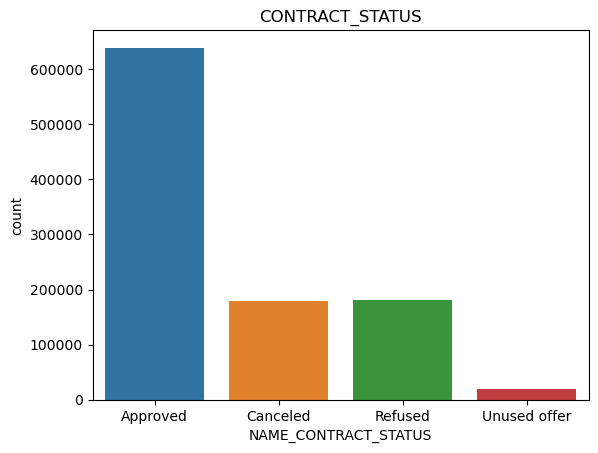

In [81]:
# viewing count plot

plt.title('CONTRACT_STATUS')
sns.countplot(x='NAME_CONTRACT_STATUS',data=merged)
plt.show()

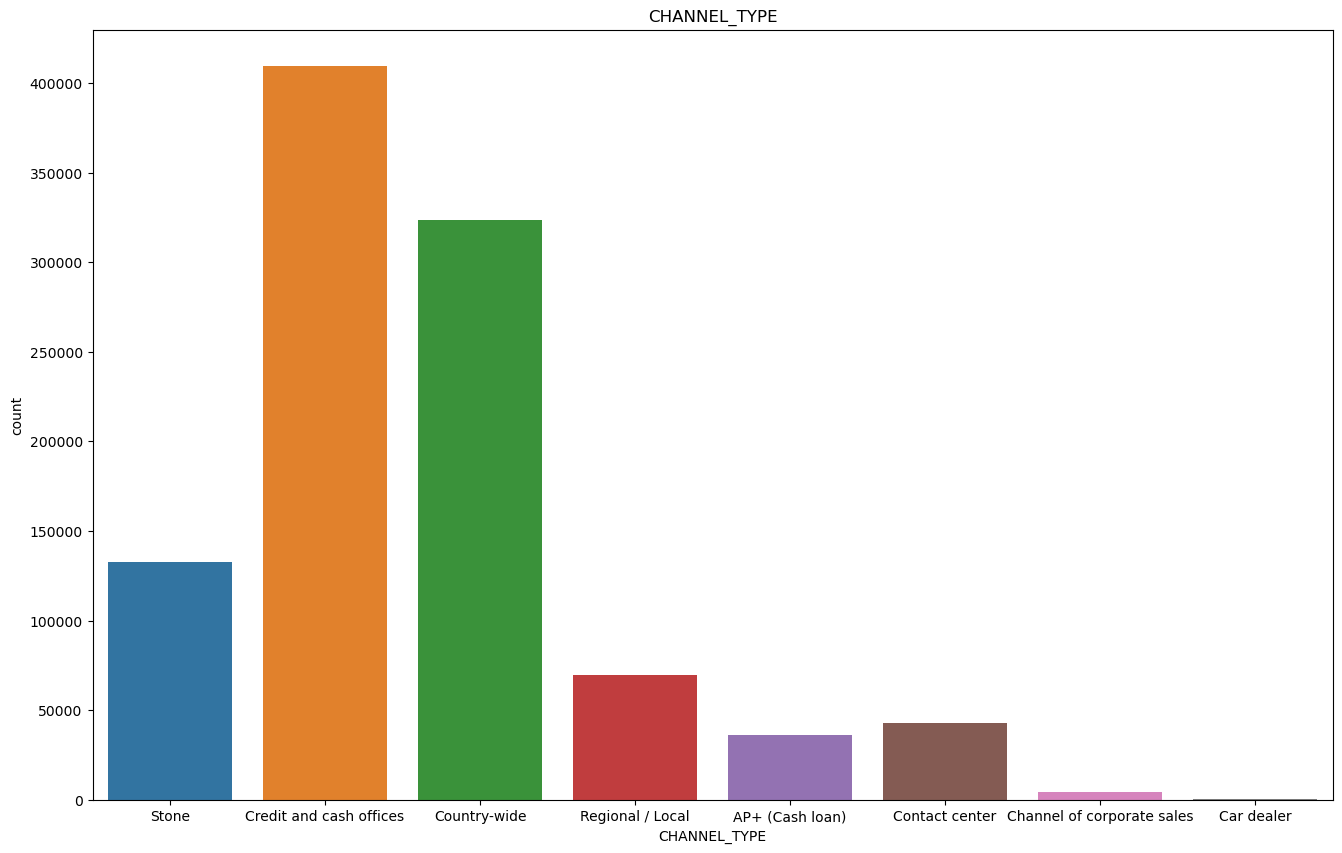

In [82]:
# viewing count plot

plt.figure(figsize = [16,10])
plt.title('CHANNEL_TYPE')
sns.countplot(x='CHANNEL_TYPE',data=merged)
plt.show()

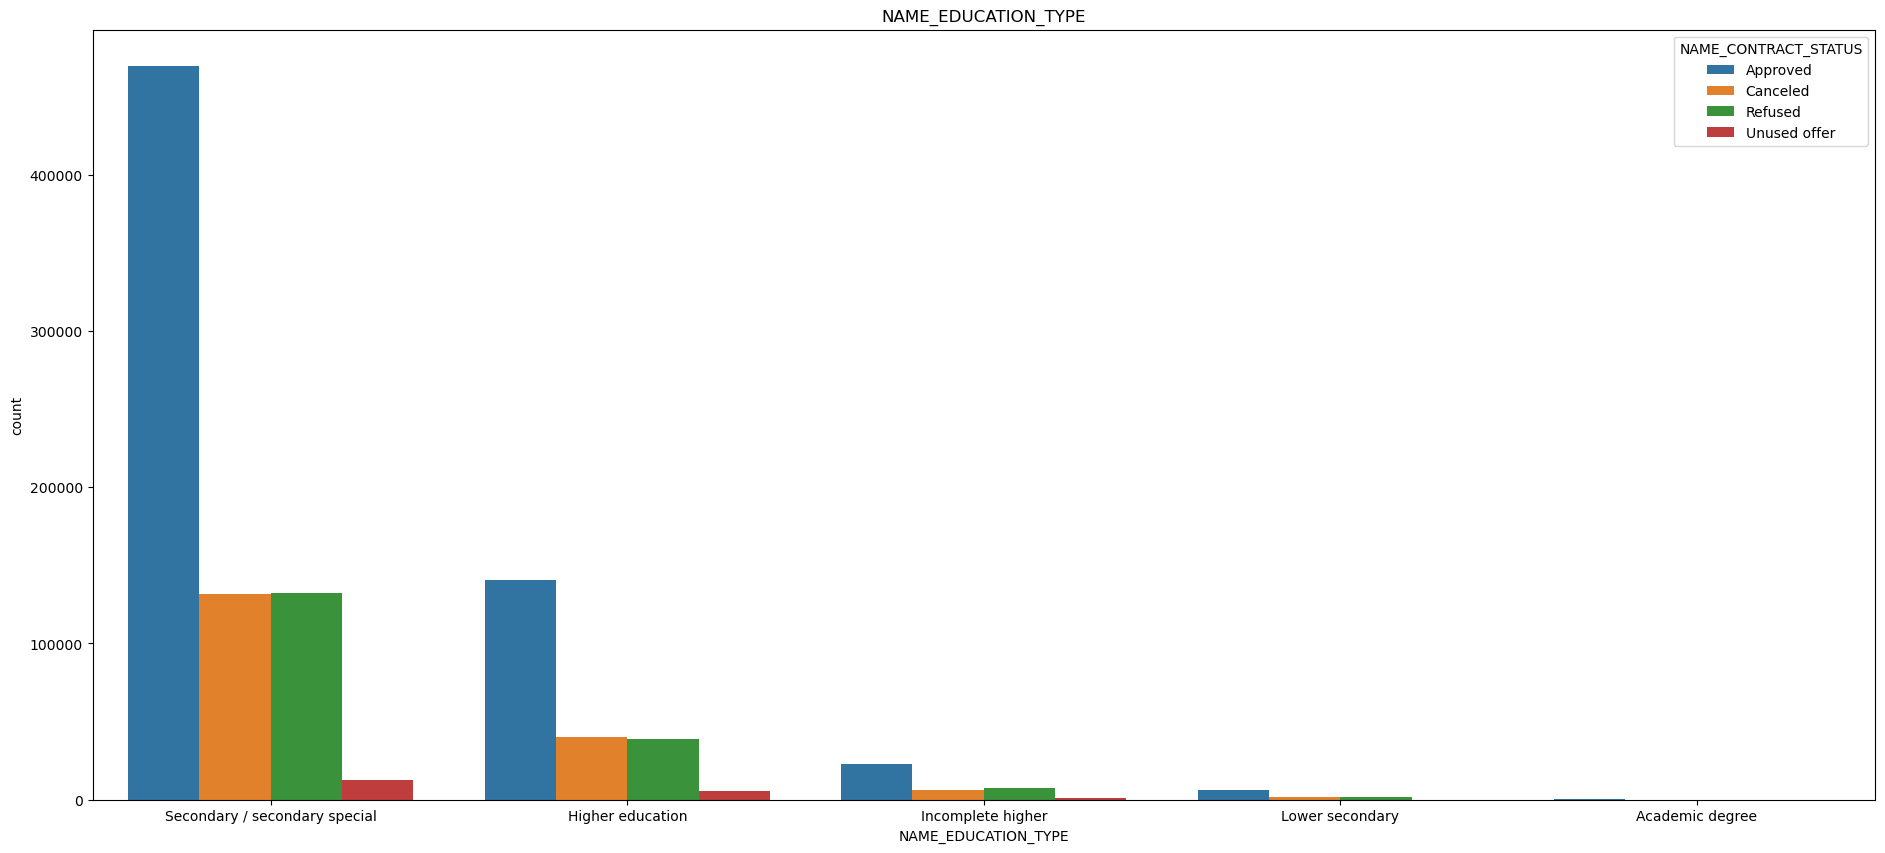

In [83]:
# viewing count plot

plt.figure(figsize=(23,10))


plt.title('NAME_EDUCATION_TYPE')
sns.countplot(x='NAME_EDUCATION_TYPE', hue='NAME_CONTRACT_STATUS', data=merged)

plt.show()


In [84]:
merged.shape

(1028953, 58)

In [86]:
merged.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AGE', 'YEARS_EMPLOYED', 'AGE_GROUP',
       'CREDIT_GROUP', 'INCOME_GROUP', 'EXT_SOURCE_SCORE',
       'EXT_SCORE_CATEGORY', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y',
       'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CA